In [8]:
import pandas as pd
import torch
from torch_geometric import seed_everything

from src.data.dataset import init_test_data_loaders
from src.modelling.pointnet_plusplus import PointNetPlusPlus
from src.modelling.evaluation import evaluate_model, plot_confusion_matrix, get_accuracy_by_class

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
# configuration
num_points = 1024
num_classes = 10
num_workers = 2
is_train_on_transformed = True

In [3]:
root = "../../data_files"
saved_weights = "weights_2023-08-31 16_32_48_10_True_1024_50"
net = PointNetPlusPlus()
path = f"{root}/saved_weights/{saved_weights}.pth"
net.load_state_dict(torch.load(path, map_location=device))

seed_everything(0)
test_loaders = init_test_data_loaders(
    f"{root}/modelnet", num_points=num_points, num_classes=num_classes, is_with_affine_transformations=True
)

In [4]:
trues, preds = {}, {}
for key in test_loaders:
    trues[key], preds[key] = evaluate_model(net, test_loaders[key], device)

0    0.800000
1    0.900000
2    0.970000
3    0.616279
4    0.790698
5    0.960000
6    0.732558
7    0.940000
8    0.860000
9    0.990000
dtype: float64
0    0.800000
1    0.900000
2    0.970000
3    0.581395
4    0.779070
5    0.930000
6    0.674419
7    0.910000
8    0.890000
9    0.980000
dtype: float64
0    0.780000
1    0.920000
2    0.950000
3    0.744186
4    0.709302
5    0.930000
6    0.732558
7    0.900000
8    0.900000
9    0.990000
dtype: float64
0    0.440000
1    0.530000
2    0.750000
3    0.372093
4    0.709302
5    0.680000
6    0.558140
7    0.530000
8    0.620000
9    0.620000
dtype: float64


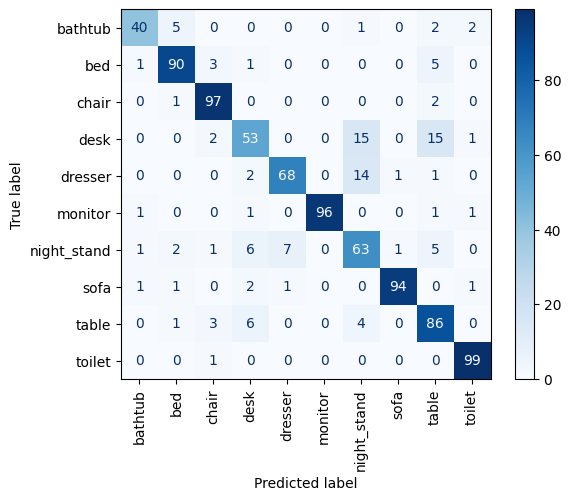

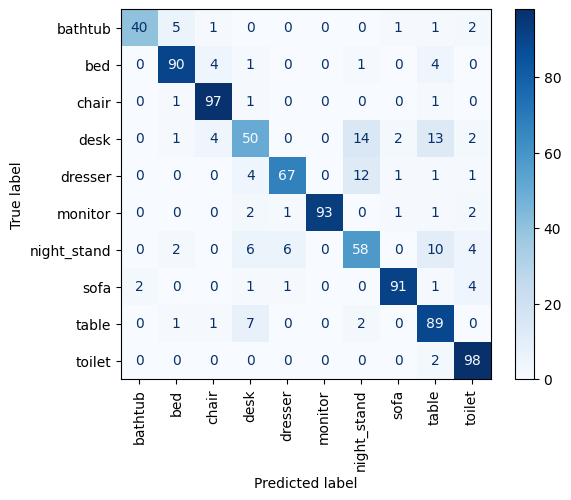

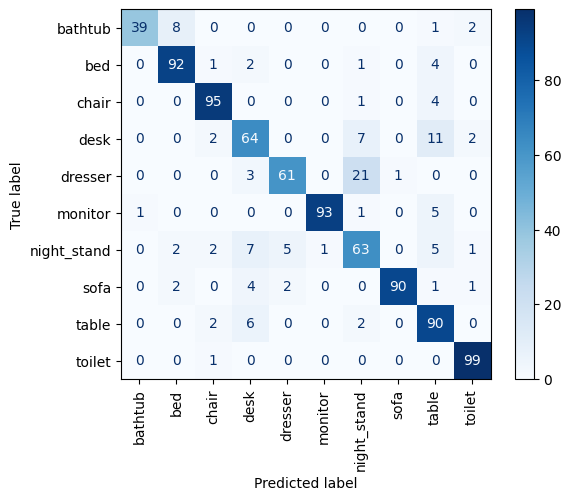

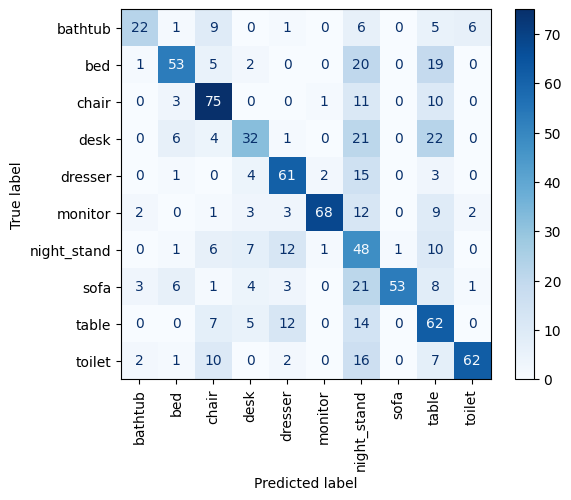

In [5]:
for key in test_loaders:
    plot_confusion_matrix(trues[key], preds[key])

In [12]:
from src.modelling.evaluation import LABELS


def create_eval_table(trues_dict: dict, pred_dict: dict, keys):
    eval_table = pd.DataFrame(index=LABELS)
    for k in keys:
        eval_table[k] = get_accuracy_by_class(trues_dict[k], pred_dict[k]).values
    return eval_table

print(create_eval_table(trues, preds, test_loaders.keys()))

\begin{tabular}{lrrrr}
\toprule
 & original & flipped & rotated & scaled \\
\midrule
bathtub & 0.800000 & 0.800000 & 0.780000 & 0.440000 \\
bed & 0.900000 & 0.900000 & 0.920000 & 0.530000 \\
chair & 0.970000 & 0.970000 & 0.950000 & 0.750000 \\
desk & 0.620000 & 0.580000 & 0.740000 & 0.370000 \\
dresser & 0.790000 & 0.780000 & 0.710000 & 0.710000 \\
monitor & 0.960000 & 0.930000 & 0.930000 & 0.680000 \\
night_stand & 0.730000 & 0.670000 & 0.730000 & 0.560000 \\
sofa & 0.940000 & 0.910000 & 0.900000 & 0.530000 \\
table & 0.860000 & 0.890000 & 0.900000 & 0.620000 \\
toilet & 0.990000 & 0.980000 & 0.990000 & 0.620000 \\
\bottomrule
\end{tabular}


In [15]:
from src.modelling.evaluation import get_accuracy

def create_acc_table(trues_dict: dict, pred_dict: dict, keys):
    acc_table = pd.DataFrame(index=["Accuracy"])
    for k in keys:
        acc_table[k.capitalize()] = get_accuracy(trues_dict[k], pred_dict[k])
    return acc_table

print(create_acc_table(trues, preds, test_loaders.keys()))

\begin{tabular}{lrrrr}
\toprule
 & Original & Flipped & Rotated & Scaled \\
\midrule
Accuracy & 0.870000 & 0.850000 & 0.870000 & 0.590000 \\
\bottomrule
\end{tabular}
